<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [80]:
from ftfy import fix_text
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [175]:
df = pd.read_csv('./data/job_listings.csv')
print(df.shape)
df.head(2)

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I


In [176]:
del df['Unnamed: 0']
df = df.drop_duplicates(subset=['description'], keep='first')
print(df.shape)
df.head(2)

(356, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [177]:
from bs4 import BeautifulSoup
import requests

def clean_description(description):
    soup = BeautifulSoup(description, 'html.parser')
    return fix_text(soup.get_text().encode('utf-8').decode('unicode-escape')[2:-1])

df['description_clean'] = df['description'].apply(clean_description)
df.head(2)

,description,title,description_clean
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements:\nConceptual understanding in...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description\n\nAs a Data Scientist 1, you ..."


## 2) Use Spacy to tokenize the listings 

In [83]:
nlp = spacy.load("en_core_web_lg")

In [179]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

df['tokens'] = df['description_clean'].apply(tokenize)

def remove_space(tokens):
    return [token for token in tokens if token != '']

df['tokens'] = df['tokens'].apply(remove_space)

In [180]:
df.head(2)

,description,title,description_clean,tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements:\nConceptual understanding in...,"[job, requirement, conceptual, understanding, ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description\n\nAs a Data Scientist 1, you ...","[job, description, Data, Scientist, 1, help, b..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [197]:
vect = CountVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       min_df=3,
                       max_df=0.97)

dtm = vect.fit_transform(df['description_clean'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [198]:
dtm.head()

,000,000 employees,04,10,10 time,10 years,100,100 000,100 companies,100 countries,...,years industry,years professional,years related,years relevant,years work,years working,yes,york,york city,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

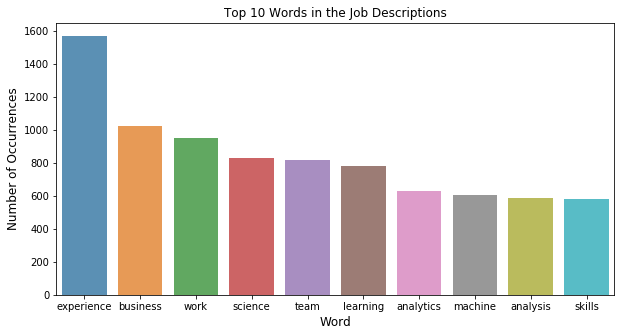

In [199]:
import seaborn as sns

def plot_top_words(dtm, top_n=10):
    word_counts = dtm.sum().sort_values(ascending=False)[:top_n]
    
    plt.figure(figsize=(top_n*1,5))
    sns.barplot(word_counts.index, word_counts.values, alpha=0.8)
    plt.title(f'Top {top_n} Words in the Job Descriptions')
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.show()
    
plot_top_words(dtm)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [201]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['description_clean']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,000 employees,04,10,10 time,10 years,100,100 000,100 companies,100 countries,...,years industry,years professional,years related,years relevant,years work,years working,yes,york,york city,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [185]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [186]:
nn.kneighbors([dtm.iloc[1].values])

(array([[0.        , 1.28112259, 1.28508789, 1.29038065, 1.29434122]]),
 array([[  1, 190, 173, 110, 244]]))

In [187]:
print(df['description_clean'][1][:300])

Job Description

As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.
A day in the


In [188]:
print(df['description_clean'][190][:300])

Overview
A Day in the Life of a Data Scientist

The primary responsibility of a Data Scientist at DriveTime is to utilize analytical, statistical and programming skills on large and complex datasets to drive business insights and decisions. This includes identifying, designing and building often com


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 

In [189]:
X = [nlp(str(d)).vector for d in df['description_clean']]

In [190]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

desc_vecs_2d = pca.fit_transform(X)

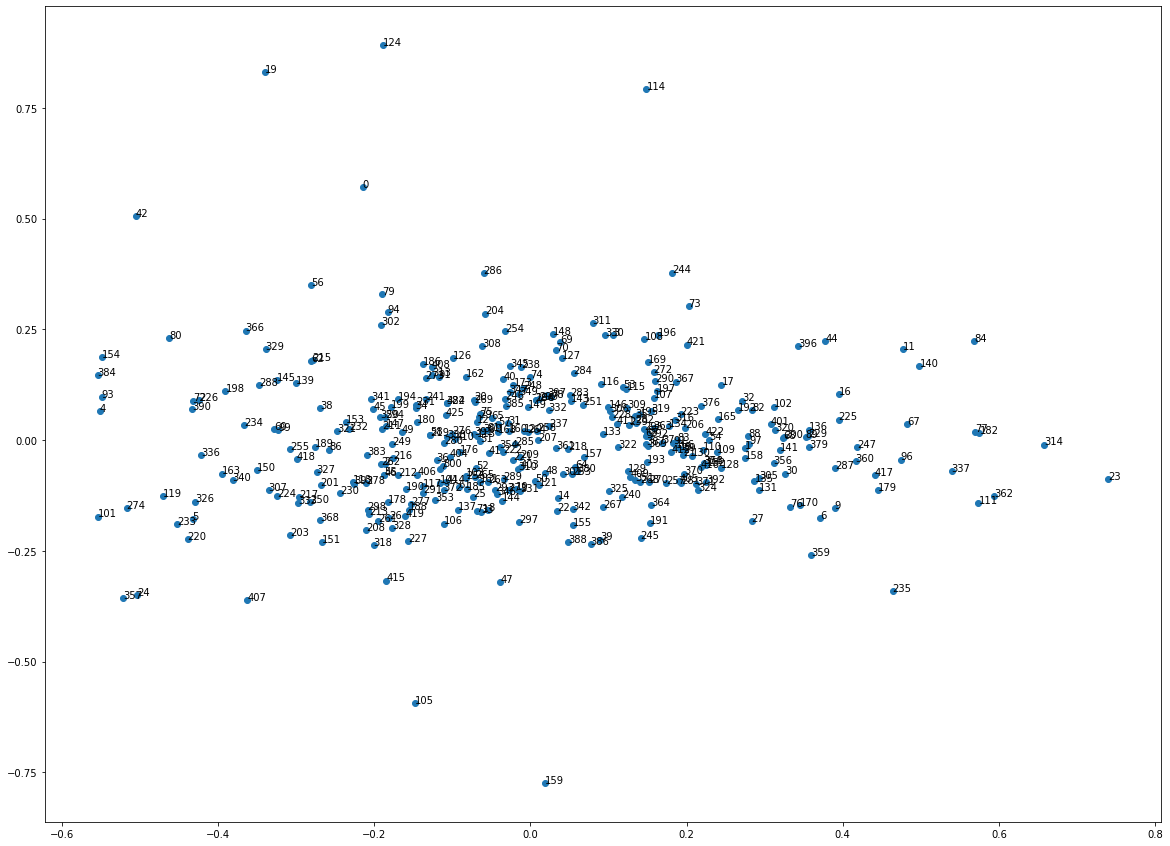

In [191]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(desc_vecs_2d[:,0], desc_vecs_2d[:,1])

# for each doc and coordinate pair: draw the text on the plot
for doc, coord in zip(df['description_clean'].index, desc_vecs_2d):
    x, y = coord
    plt.text(x, y, doc, size=10)

# show the plot
plt.show()

In [208]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

browser = webdriver.Chrome('../chromedriver')
browser.get('http://www.yahoo.com')
assert 'Yahoo' in browser.title

elem = browser.find_element_by_name('p')  # Find the search box
elem.send_keys('seleniumhq' + Keys.RETURN)

browser.quit()

ProtocolError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [206]:
browser.quit()